In [9]:
from rdkit.Chem import SDMolSupplier, Draw
from rdkit import Chem
import sys
sys.path.append("../")
from tcad.mapex.genetic import GA
from tcad.mapex.pharmacophore import PharmComplex


## Loading clustered molecules

loaded 40 molecules


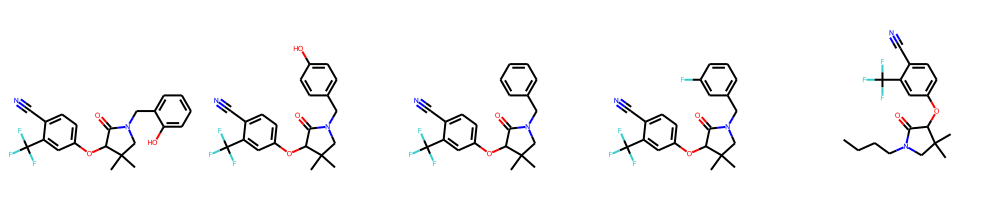

In [15]:
filepath = "../data/molecules/androgen.sdf"
molecules = []


suppl = Chem.SDMolSupplier(filepath) 
    
for molecule in suppl:
    molecules.append(molecule)

print(f"loaded {len(molecules)} molecules")
Draw.MolsToGridImage(molecules[5:10], molsPerRow=5)

## As input genetic algoritm instance takes smiles representations

In [16]:
smiles = [Chem.MolToSmiles(molecule) for molecule in molecules[:7]]

### Genetic Algorithm (GA) instance
Creates a GA instance with following params:
- Set of molecules
- Number of conformers
- Number of individs in generation
- Chance for mutation to occur
- Number of generations
- Use Crippen (False) to perform alignment
- Verbose for details

In [17]:
ga_instance = GA(smiles, 10, 10, 0.6, 30,)
ga_instance.run(logg_iter=10)

2022-01-24 16:42:55.299748 | INFO | Generating conformations..
2022-01-24 16:42:58.106478 | INFO | Done..
2022-01-24 16:42:59.943093 | INFO | Best chromosome score is: 0.683 | run 1
2022-01-24 16:43:14.036570 | INFO | Best chromosome score is: 0.806 | run 11
2022-01-24 16:43:28.050030 | INFO | Best chromosome score is: 0.806 | run 21
2022-01-24 16:43:42.537664 | INFO | Best chromosome score is: 0.806 | run 30


In [18]:
# get aligned molecules and best conformation ids
aligned_molecules = ga_instance.get_molecules()
best_chromosome = ga_instance.best_chromosome

# writing molecules to mol blocks
mol_blocks = [Chem.MolToMolBlock(mol, confId=idx) for mol, idx  in zip(aligned_molecules, best_chromosome)]

## Building a pharmacophore

In [19]:
p_complex=PharmComplex(aligned_molecules, best_chromosome)
p_complex.create()

coords = p_complex.get_coords()

## Visualize molecules and pharmacophore features

In [20]:
view = p_complex.show(mol_blocks, coords)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol